In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coal_subcritical = pd.read_csv('../CEEW_subcritical_with_ws_price.csv')
coal_supercritical = pd.read_csv('../CEEW_supercritical_with_ws_price.csv')

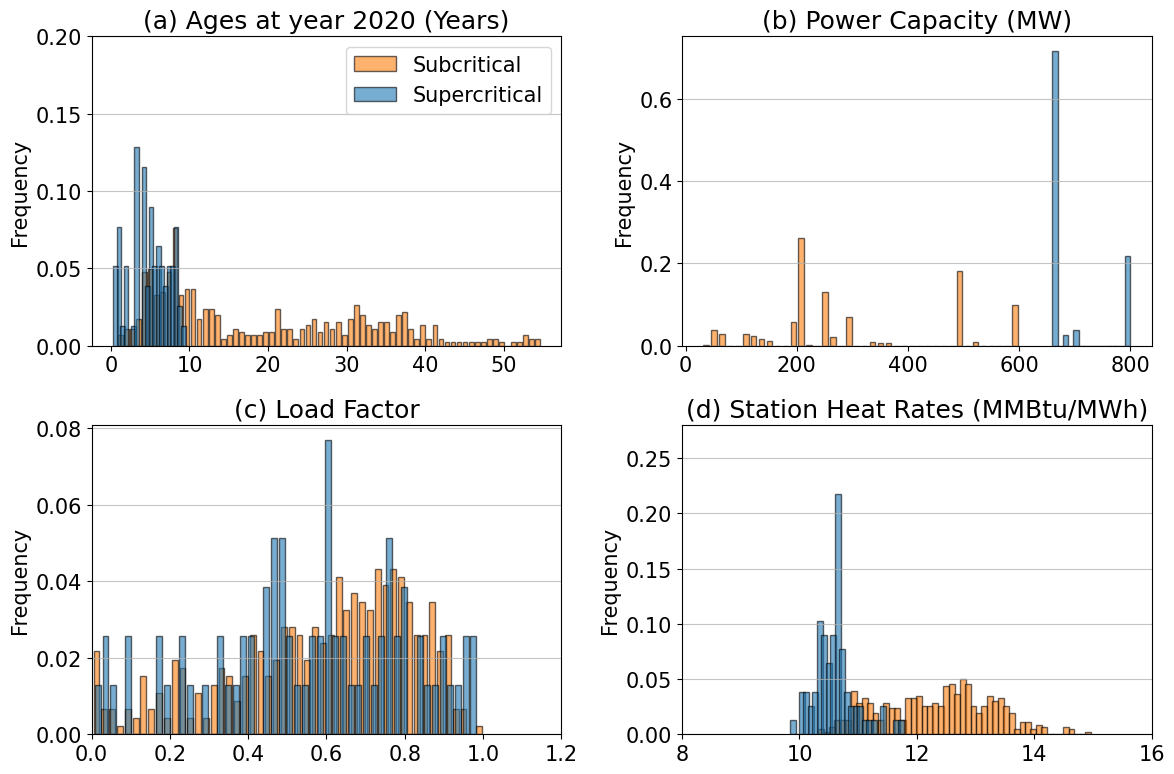

In [4]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})
plt.subplot(2,2,1)
hist1 = np.histogram(coal_subcritical.loc[:,'Age'], bins=70)
mid_hist1 = np.zeros(len(hist1[0]))
for i in range(len(hist1[0])):
    mid_hist1[i] = hist1[1][i] + (hist1[1][i + 1] - hist1[1][i]) / 2
plt.bar(mid_hist1, hist1[0] / sum(hist1[0]),width=0.6, color='tab:orange', edgecolor='k', alpha=0.6, label='Subcritical')
hist2 = np.histogram(coal_supercritical.loc[:,'Age'], bins=20)
mid_hist2 = np.zeros(len(hist2[0]))
for i in range(len(hist2[0])):
    mid_hist2[i] = hist2[1][i] + (hist2[1][i + 1] - hist2[1][i]) / 2
plt.bar(mid_hist2, hist2[0] / sum(hist2[0]),width=0.6, color='tab:blue', edgecolor='k', alpha=0.6, label='Supercritical')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 0.2)
plt.ylabel('Frequency')
plt.title('(a) Ages at year 2020 (Years)')
plt.legend()


plt.subplot(2,2,2)
hist1 = np.histogram(coal_subcritical.loc[:,'Capacity'], bins=40)
mid_hist1 = np.zeros(len(hist1[0]))
for i in range(len(hist1[0])):
    mid_hist1[i] = hist1[1][i] + (hist1[1][i + 1] - hist1[1][i]) / 2
plt.bar(mid_hist1, hist1[0] / sum(hist1[0]),width=10, color='tab:orange', edgecolor='k', alpha=0.6, label='Subcritical')
hist2 = np.histogram(coal_supercritical.loc[:,'Capacity'], bins=15)
mid_hist2 = np.zeros(len(hist2[0]))
for i in range(len(hist2[0])):
    mid_hist2[i] = hist2[1][i] + (hist2[1][i + 1] - hist2[1][i]) / 2
plt.bar(mid_hist2, hist2[0] / sum(hist2[0]),width=10, color='tab:blue',  edgecolor='k', alpha=0.6, label='Supercritical')
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequency')
plt.title('(b) Power Capacity (MW)')

plt.subplot(2,2,3)
hist1 = np.histogram(coal_subcritical.loc[:,'Actual avg PLF'], bins=50)
mid_hist1 = np.zeros(len(hist1[0]))
for i in range(len(hist1[0])):
    mid_hist1[i] = hist1[1][i] + (hist1[1][i + 1] - hist1[1][i]) / 2
plt.bar(mid_hist1, hist1[0] / sum(hist1[0]),width=0.015, color='tab:orange', edgecolor='k', alpha=0.6, label='Subcritical')
hist2 = np.histogram(coal_supercritical.loc[:,'Actual avg PLF'], bins=50)
mid_hist2 = np.zeros(len(hist2[0]))
for i in range(len(hist2[0])):
    mid_hist2[i] = hist2[1][i] + (hist2[1][i + 1] - hist2[1][i]) / 2
plt.bar(mid_hist2, hist2[0] / sum(hist2[0]),width=0.015, color='tab:blue',  edgecolor='k', alpha=0.6, label='Supercritical')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 1.2)
plt.ylabel('Frequency')
plt.title('(c) Load Factor')

plt.subplot(2,2,4)
hist1 = np.histogram(coal_subcritical.loc[:,'Actual SHR']* 3.96567/1000, bins=50)
mid_hist1 = np.zeros(len(hist1[0]))
for i in range(len(hist1[0])):
    mid_hist1[i] = hist1[1][i] + (hist1[1][i + 1] - hist1[1][i]) / 2
plt.bar(mid_hist1, hist1[0] / sum(hist1[0]),width=0.1, color='tab:orange', edgecolor='k', alpha=0.6, label='Subcritical')
hist2 = np.histogram(coal_supercritical.loc[:,'Actual SHR']* 3.96567/1000, bins=25)
mid_hist2 = np.zeros(len(hist2[0]))
for i in range(len(hist2[0])):
    mid_hist2[i] = hist2[1][i] + (hist2[1][i + 1] - hist2[1][i]) / 2
plt.bar(mid_hist2, hist2[0] / sum(hist2[0]),width=0.1, color='tab:blue',  edgecolor='k', alpha=0.6, label='Supercritical')
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequency')
plt.xlim(8, 16)
plt.ylim(0, 0.28)
plt.title('(d) Station Heat Rates (MMBtu/MWh)')

plt.tight_layout()
plt.savefig('Coal_power_plant_characters.png', bbox_inches='tight')

In [5]:
predicted_sub   = pd.read_csv('../gem_predicted_subcritical.csv')
predicted_super = pd.read_csv('../gem_predicted_supercritical.csv')

In [6]:
Heat_value_sub = pd.DataFrame({'GEM_sub': predicted_sub['Heat rate (Btu per kWh)']/1000,
                           'Actual_sub': predicted_sub['Predicted_HR_50.0']
                           })

Heat_value_super = pd.DataFrame({'GEM_super': predicted_super['Heat rate (Btu per kWh)']/1000,
                           'Actual_super': predicted_super['Predicted_HR_50.0'], 
                           })


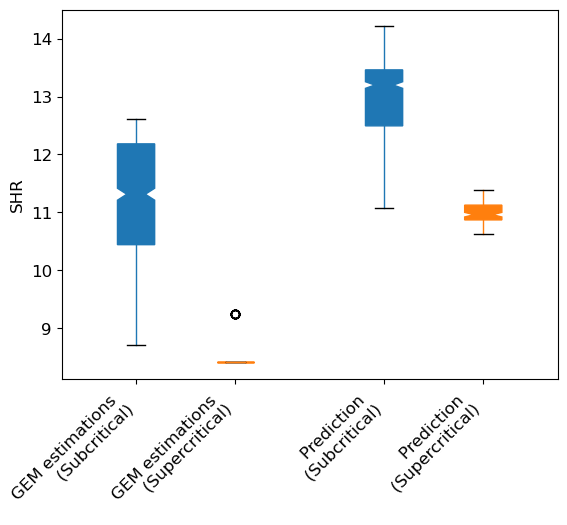

In [8]:
plt.figure()
plt.rcParams.update({'font.size': 12})
plt.boxplot(Heat_value_sub, positions=np.arange(1, 3)-0.2,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,
                     boxprops=dict(facecolor='tab:blue', color='tab:blue'),
                     whiskerprops=dict(color='tab:blue'),
                     medianprops=dict(color='tab:blue'),
                     labels=['GEM estimations \n (Subcritical)', 'Prediction \n (Subcritical)'])  # will be used to label x-ticks
plt.boxplot(Heat_value_super,positions=np.arange(1, 3)+0.2,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,
                     boxprops=dict(facecolor='tab:orange', color='tab:orange'),
                     whiskerprops=dict(color='tab:orange'),
                     medianprops=dict(color='tab:orange'),
                     labels=['GEM estimations \n (Supercritical)', 'Prediction \n (Supercritical)'])  # will be used to label x-ticks
plt.xticks(rotation=45, ha='right')
plt.xlim(0.5, 2.5)
plt.ylabel('SHR')
plt.savefig('../ML_training_plots/prediction_distributions.png', bbox_inches='tight')

In [9]:
print(np.average(predicted_sub['Heat rate (Btu per kWh)']/1000), 
      np.average(predicted_sub['Predicted_HR_50.0']))

print(np.average(predicted_super['Heat rate (Btu per kWh)']/1000), 
      np.average(predicted_super['Predicted_HR_50.0']))

11.165576704545455 12.905882541792344
8.557411764705884 10.990445184379983


/var/folders/9p/t6ljp_1516q16t2lqgyjw0w80000gp/T/ipykernel_54089/1220859348.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


<Figure size 640x480 with 0 Axes>

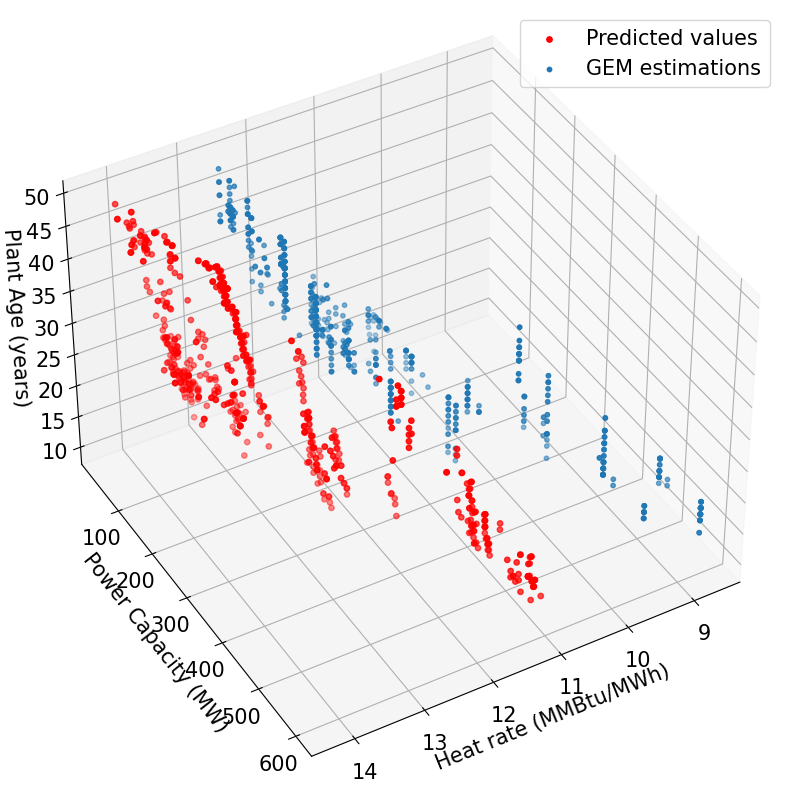

In [10]:
plt.figure()
plt.rcParams.update({'font.size': 15})
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

x = predicted_sub['Predicted_HR_50.0']
y = predicted_sub['Capacity (MW)']
gem_age = 50-predicted_sub['Remaining plant lifetime (years)']
ax.scatter(x, y, zs=gem_age, zdir='z', color='red', s=15, label='Predicted values')

x1 = predicted_sub['Heat rate (Btu per kWh)'] /1000
y1 = predicted_sub['Capacity (MW)']
ax.scatter(x1, y1, zs=gem_age, zdir='z', color='tab:blue', s=10, label='GEM estimations')
ax.legend()
ax.set_xlabel('Heat rate (MMBtu/MWh)')
ax.set_ylabel('Power Capacity (MW)')
ax.set_zlabel('Plant Age (years)')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=40., azim=60)
ax.dist = 10

plt.savefig('../ML_training_plots/prediction_results.png', bbox_inches='tight')